In [1]:
# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import pandas as pd

# Load dataset with automatic separator detection
df_base = pd.read_csv(
    "indian_restaurants.csv",
    sep=None,           # auto-detect delimiter
    engine="python",    # more flexible parser
    on_bad_lines="skip" # skip problematic rows if any
)

# Inspect first rows
print(df_base.head())

   import                                     pandas  as  pd
0  import                                     random NaN NaN
1     def  generate_restaurant_data(num_records=50): NaN NaN
2     def                                    main(): NaN NaN


In [6]:
# Generate synthetic sales and profit margin columns
np.random.seed(42)

df_base["monthly_sales"] = np.random.randint(1000, 50000, size=len(df_base)) 
df_base["profit_margin"] = np.round(np.random.uniform(5, 40, size=len(df_base)), 2)  # % margin

# Add demographic info (average customer age and segment)
df_base["avg_customer_age"] = np.random.randint(18, 65, size=len(df_base))
df_base["dominant_segment"] = np.random.choice(
    ["Student", "Family", "Working Professional", "Tourist"], size=len(df_base))

In [7]:
df_base.describe()

,as,pd,monthly_sales,profit_margin,avg_customer_age
count,0.0,0.0,3.000000,3.000000,3.000000
mean,NaN,NaN,19271.000000,22.343333,34.666667
std,NaN,NaN,18771.870791,10.552840,6.110101
min,NaN,NaN,1860.000000,10.460000,28.000000
25%,NaN,NaN,9327.500000,18.205000,32.000000
50%,NaN,NaN,16795.000000,25.950000,36.000000
75%,NaN,NaN,27976.500000,28.285000,38.000000
max,NaN,NaN,39158.000000,30.620000,40.000000


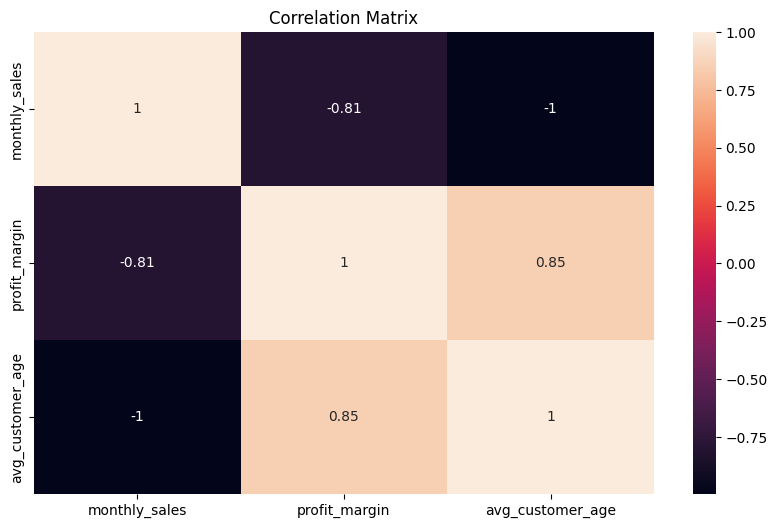

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_base[["monthly_sales", "profit_margin", "avg_customer_age"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

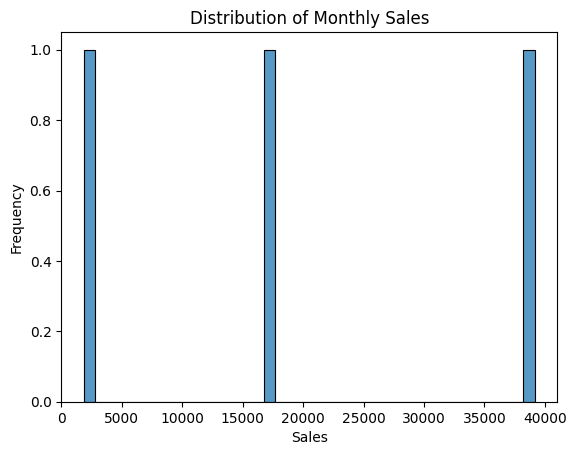

In [9]:
sns.histplot(df_base["monthly_sales"], bins=40)
plt.title("Distribution of Monthly Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

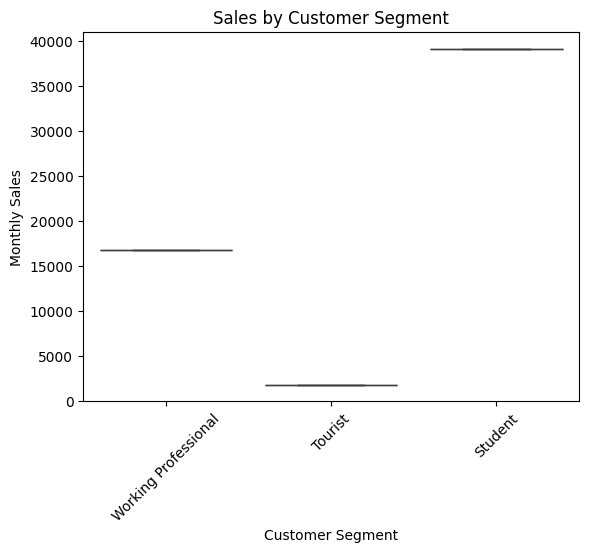

In [10]:
sns.boxplot(data=df_base, x="dominant_segment", y="monthly_sales")
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Monthly Sales")
plt.xticks(rotation=45)
plt.show()

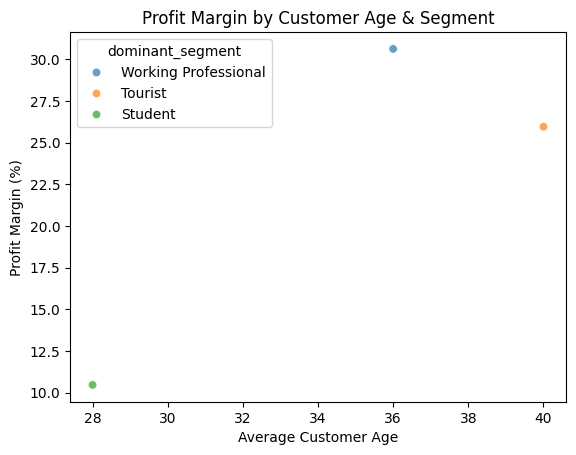

In [11]:
sns.scatterplot(data=df_base, x="avg_customer_age", y="profit_margin",
                hue="dominant_segment", alpha=0.7)
plt.title("Profit Margin by Customer Age & Segment")
plt.xlabel("Average Customer Age")
plt.ylabel("Profit Margin (%)")
plt.show()

In [12]:
df_base.to_csv("indian_meals_sales_profit_demo.csv", index=False)
print("Dataset saved ✔️")

Dataset saved ✔️
